In [0]:
#Description: This program predicts the price of FB stock for a specific day using the Machine Learning algorithm called 
#             Support Vector Regression (SVR) Model

In [0]:
#import the packages
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('FB_30_days.csv')
df.head(7)

Saving FB_30_days.csv to FB_30_days.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,2019-05-02,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,2019-05-03,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
5,2019-05-08,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
6,2019-05-09,187.199997,189.770004,186.259995,188.649994,188.649994,12967000


In [0]:
#Create the independent and dependent data sets
dates = []
prices = []

In [5]:
#Get the shape of dataset
df.shape

(22, 7)

In [6]:
#Print the last row of data (this will be the data that we test on)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2019-05-31,180.279999,180.539993,177.160004,177.470001,177.470001,15226500


In [8]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
print(df.shape)

(21, 7)


In [0]:
df_dates = df.loc[:,'Date'] #Get all of the rows from the Date column
df_open = df.loc[:,'Open'] #Get all of the rows from the Open Column

In [0]:
#Create the independent data set 'X' as dates
for date in df_dates:
  dates.append( [int(date.split('-')[2])])

#Create the dependent data set 'Y' as prices
for open_price in df_open:
  prices.append(float(open_price))

In [19]:
#See what days were recorded in the data set
print(dates)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30]]


In [0]:
#Function to make predictions using 3 different support vector regression models with 3 different kernals
def predict_prices(dates, prices, X):

  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

  #Train the models on teh dates and prices
  svr_lin.fit(dates, prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)

  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.scatter(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.scatter(dates, svr_lin.predict(dates), color = 'blue', label='Linear model')
  plt.scatter(dates, svr_poly.predict(dates), color = 'green', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()

  #return all three model predictions
  return svr_rbf.predict(X)[0], svr_lin.predict(X)[0], svr_poly.predict(X)[0]

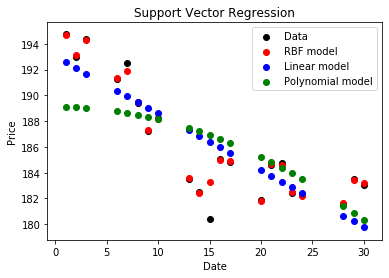

(180.33354977415465, 179.34125331240614, 179.7025944161506)


In [40]:
#Predict the price of FB on day 31
predicted_price = predict_prices(dates, prices, [[31]])
print(predicted_price)